# Online dictionary learning

In [1]:
%matplotlib inline
print(__doc__)

import time

import matplotlib.pyplot as plt
import numpy as np


from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d

faces = datasets.fetch_olivetti_faces()

Automatically created module for IPython interactive environment


### Plot sample facial image

Data dimensions (400, 64, 64)


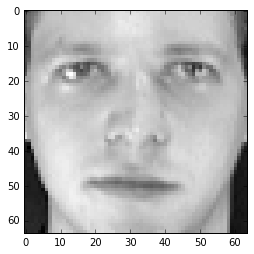

In [ ]:
print "Data dimensions", np.shape(faces.images)
img = faces.images[0]
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')

In [ ]:
###############################################################################
# Learn the dictionary of images

print('Learning the dictionary... ')
rng = np.random.RandomState(0)
dl = MiniBatchDictionaryLearning(n_components=100, alpha=1, n_iter=50)
patch_size = (20, 20)

buffer = []
index = 1
t0 = time.time()

# The online learning part: cycle over the whole dataset 6 times
index = 0
for _ in range(6):
    for img in faces.images:
        data = extract_patches_2d(img, patch_size, max_patches=10, random_state=rng)
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        if index % 100 == 0:
            data = np.concatenate(buffer, axis=0)
            data -= np.mean(data, axis=0)
            data /= np.std(data, axis=0)
            dl.partial_fit(data)
            buffer = []
            print('Partial fit of %4i out of %i' % (index, 6 * len(faces.images)))

dt = time.time() - t0
print('done in %.2fs.' % dt)

Learning the dictionary... 
Partial fit of  100 out of 2400
Partial fit of  200 out of 2400
Partial fit of  300 out of 2400
Partial fit of  400 out of 2400
Partial fit of  500 out of 2400
Partial fit of  600 out of 2400
Partial fit of  700 out of 2400
Partial fit of  800 out of 2400
Partial fit of  900 out of 2400
Partial fit of 1000 out of 2400
Partial fit of 1100 out of 2400
Partial fit of 1200 out of 2400
Partial fit of 1300 out of 2400
Partial fit of 1400 out of 2400

In [ ]:
###############################################################################
# Plot the results
plt.figure(figsize=(8, 7))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())

plt.suptitle('Patches of faces\nTrain time %.1fs on %d patches' %
             (dt, 8 * len(faces.images)), fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()